In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Raw_Dataset.csv')
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,£35K (Employer est.),"Data mining, Big data, R, Data analysis skills..."
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,£31.00 Per Hour (Employer est.),"R, SQL, JavaScript, Python"
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,£50K - £65K (Employer est.),"SQL, Maths, Data science, Python"
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,£41K - £54K (Glassdoor est.),"Software deployment, Data analysis skills, Sta..."
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,£60K - £90K (Employer est.),"MATLAB, R, Maths, C, Machine learning"


In [ ]:
df.describe(include='all')

,Company,Company Score,Job Title,Location,Date,Salary,Skills
count,750,697.000000,750,750,750,635,742
unique,454,NaN,563,87,30,447,660
top,JPMorgan Chase & Co,NaN,Data Scientist,"London, England",30d+,£70K - £110K (Glassdoor est.),"Machine learning, Natural language processing,..."
freq,13,NaN,67,445,426,8,9
mean,NaN,3.847633,NaN,NaN,NaN,NaN,NaN
std,NaN,0.461629,NaN,NaN,NaN,NaN,NaN
min,NaN,1.700000,NaN,NaN,NaN,NaN,NaN
25%,NaN,3.600000,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.900000,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.100000,NaN,NaN,NaN,NaN,NaN


In [ ]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 56.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f174b6471beb9e22403e7178a19fdf534774a14d99c1bc0af20b5b07070d9ab6
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
!pip install ipywidgets

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Summary Report")
profile.to_notebook_iframe()
# profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df['Salary'] = df['Salary'].str.replace('£','').str.replace('K','000')

In [ ]:
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,35000 (Employer est.),"Data mining, Big data, R, Data analysis skills..."
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,31.00 Per Hour (Employer est.),"R, SQL, JavaScript, Python"
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,50000 - 65000 (Employer est.),"SQL, Maths, Data science, Python"
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,41000 - 54000 (Glassdoor est.),"Software deployment, Data analysis skills, Sta..."
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,60000 - 90000 (Employer est.),"MATLAB, R, Maths, C, Machine learning"


In [ ]:
df['Salary'] = df['Salary'].str.replace(r'\(Employer est.\)','',regex = True)
df['Salary'] = df['Salary'].str.replace(r'\(Glassdoor est.\)','',regex = True)

In [ ]:
import re

In [ ]:
def convert_to_yearly(salary):
  if 'Per Hour' in str(salary):
    hourly_rate = re.findall(r'\d+\.?\d*', salary)
    if hourly_rate:
      return float(hourly_rate[0])*2080
  return salary
df['Salary'] = df['Salary'].apply(convert_to_yearly)

In [ ]:
df['Salary'] = df['Salary'].astype(str)

In [ ]:
df[['salary_min','salary_max']] = df['Salary'].str.split('-', expand=True)

In [ ]:
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills,salary_min,salary_max
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,35000,"Data mining, Big data, R, Data analysis skills...",35000,None
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,64480.0,"R, SQL, JavaScript, Python",64480.0,None
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,50000 - 65000,"SQL, Maths, Data science, Python",50000,65000
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,41000 - 54000,"Software deployment, Data analysis skills, Sta...",41000,54000
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,60000 - 90000,"MATLAB, R, Maths, C, Machine learning",60000,90000


In [ ]:
df['salary_min'] = df['salary_min'].str.strip()
df['salary_max'] = df['salary_max'].str.strip()

In [ ]:
df['salary_min'] = pd.to_numeric(df['salary_min'],errors = 'coerce')
df['salary_max'] = pd.to_numeric(df['salary_max'],errors = 'coerce')

In [ ]:
df['Location'] = df['Location'].astype(str)

In [ ]:
df[['city','country']] = df['Location'].str.split(',',n=1,expand=True)

In [ ]:
df.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills,salary_min,salary_max,city,country
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,35000,"Data mining, Big data, R, Data analysis skills...",35000.0,NaN,Manchester,England
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,64480.0,"R, SQL, JavaScript, Python",64480.0,NaN,London,England
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,50000 - 65000,"SQL, Maths, Data science, Python",50000.0,65000.0,Nottingham,England
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,41000 - 54000,"Software deployment, Data analysis skills, Sta...",41000.0,54000.0,Edinburgh,Scotland
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,60000 - 90000,"MATLAB, R, Maths, C, Machine learning",60000.0,90000.0,London,England


In [ ]:
skills_split = df['Skills'].str.get_dummies(sep=',')

In [ ]:
skills_split

,AI,APIs,ATS,AWS,Account management,Accounting,Adobe Flash,Agile,Alteryx,Analysis skills,...,Supervising experience,Supply chain,System design,Tableau,Teaching,TensorFlow,Test-driven development,Ukrainian,Underwriting,XML
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_with_skills = pd.concat([df, skills_split], axis=1)
df_with_skills.head()

,Company,Company Score,Job Title,Location,Date,Salary,Skills,salary_min,salary_max,city,...,Supervising experience,Supply chain,System design,Tableau,Teaching,TensorFlow,Test-driven development,Ukrainian,Underwriting,XML
0,Razorpoint,3.4,Junior Data Scientist,"Manchester, England",3d,35000,"Data mining, Big data, R, Data analysis skills...",35000.0,NaN,Manchester,...,0,0,0,0,0,0,0,0,0,0
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,"London, England",5d,64480.0,"R, SQL, JavaScript, Python",64480.0,NaN,London,...,0,0,0,0,0,0,0,0,0,0
2,TW,4.0,Data Scientist,"Nottingham, England",30d+,50000 - 65000,"SQL, Maths, Data science, Python",50000.0,65000.0,Nottingham,...,0,0,0,0,0,0,0,0,0,0
3,NatWest Group,4.6,Data Scientist,"Edinburgh, Scotland",2d,41000 - 54000,"Software deployment, Data analysis skills, Sta...",41000.0,54000.0,Edinburgh,...,0,0,0,0,0,0,0,0,0,0
4,iwoca,3.9,Data Scientist - Ops,"London, England",7d,60000 - 90000,"MATLAB, R, Maths, C, Machine learning",60000.0,90000.0,London,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from wordcloud import WordCloud

In [ ]:
skill_frequencies = df_with_skills.iloc[:,df_with_skills.columns.get_loc('AI'):].sum().sort_values(ascending=False)
skill_frequencies

,0
TensorFlow,165
Machine learning,57
Azure,54
Power BI,50
R,26
...,...
Qualitative analysis,1
Public health,1
Mandarin,1
LabView,1


In [ ]:
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(skill_frequencies)

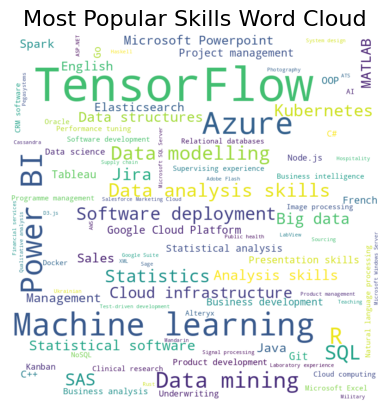

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Popular Skills Word Cloud',fontsize = 16)
plt.show()

In [64]:
top_10_skills = skill_frequencies.head(10)

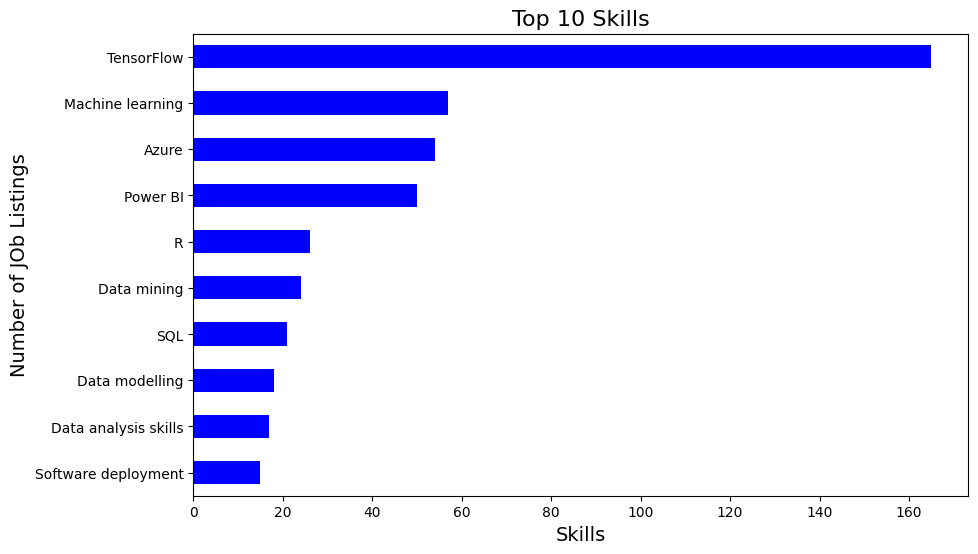

In [65]:
plt.figure(figsize=(10,6))
top_10_skills.plot(kind='barh',color='Blue')
plt.ylabel('Number of JOb Listings',fontsize = 14)
plt.xlabel('Skills',fontsize = 14)
plt.title('Top 10 Skills',fontsize = 16)
plt.gca().invert_yaxis()
plt.show()

In [66]:
da_jobs = df_with_skills[df_with_skills['Job Title'].str.contains('Data Analyst', case=False)]

da_skills = da_jobs.iloc[:, da_jobs.columns.get_loc('AI'):].sum().sort_values(ascending=False)

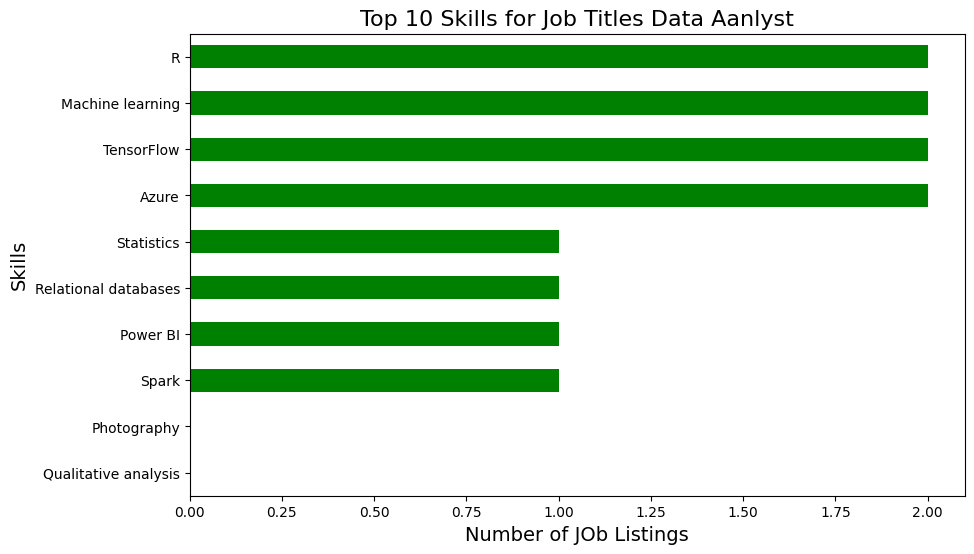

In [67]:
top_10_da_skills = da_skills.head(10)
plt.figure(figsize=(10,6))
top_10_da_skills.plot(kind='barh',color='Green')
plt.xlabel('Number of JOb Listings',fontsize = 14)
plt.ylabel('Skills',fontsize = 14)
plt.title('Top 10 Skills for Job Titles Data Aanlyst',fontsize = 16)
plt.gca().invert_yaxis()
plt.show()

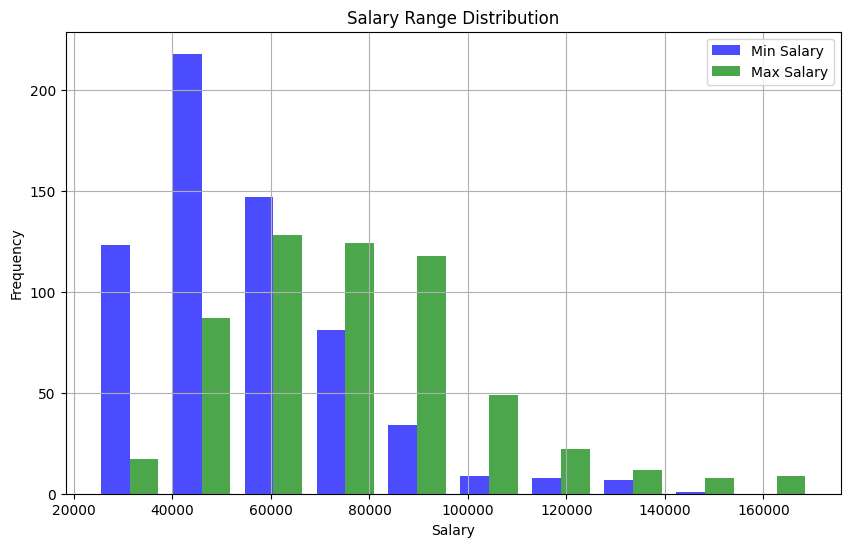

In [68]:
plt.figure(figsize=(10,6))
plt.hist([df['salary_min'],df['salary_max']],bins = 10,label = ['Min Salary','Max Salary'], color=['blue','green'],alpha = 0.7)
plt.title('Salary Range Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

In [76]:
top_companies = df['Company'].value_counts().head(10)
top_job_titles = df['Job Title'].value_counts().head(10)

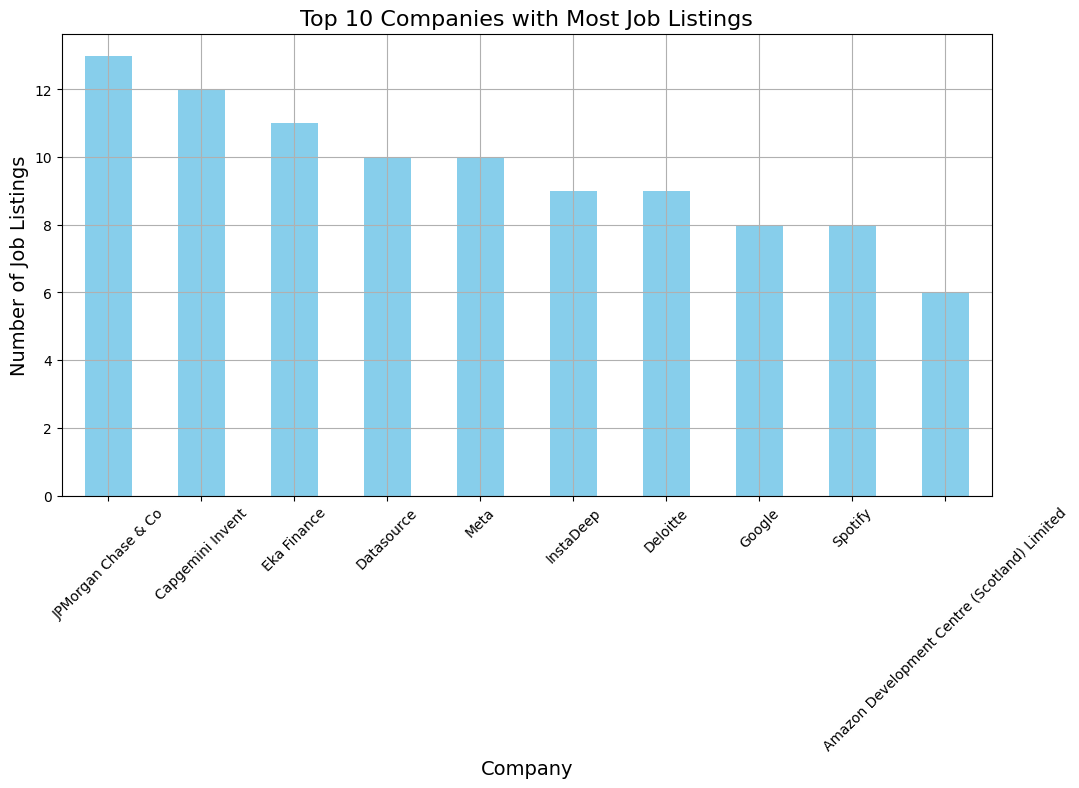

In [77]:
plt.figure(figsize=(12,6))
top_companies.plot(kind='bar',color='skyblue')
plt.xlabel('Company',fontsize = 14)
plt.ylabel('Number of Job Listings',fontsize = 14)
plt.title('Top 10 Companies with Most Job Listings',fontsize = 16)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


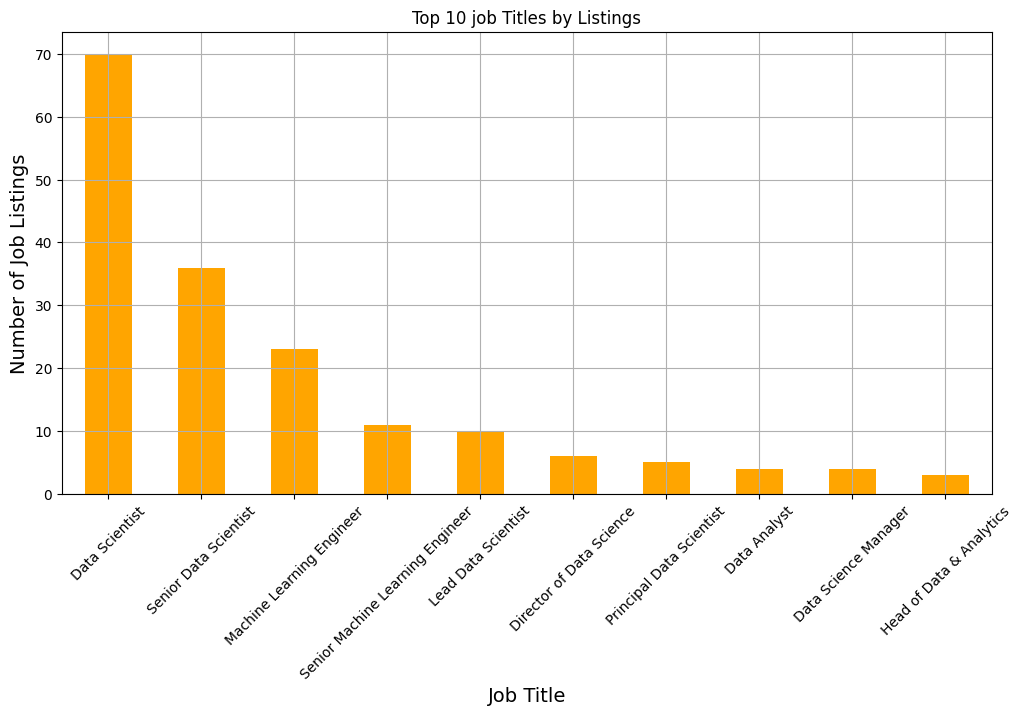

In [78]:
plt.figure(figsize=(12,6))
top_job_titles.plot(kind='bar',color='orange')
plt.xlabel('Job Title',fontsize = 14)
plt.ylabel('Number of Job Listings',fontsize = 14)
plt.title('Top 10 job Titles by Listings')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [73]:
df['Job Title'] = df['Job Title'].str.replace('DATA SCIENTIST', 'Data Scientist', case=False)